## Intall packages

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import time
sns.set()

In [2]:
%pip install kaggle
%pip install jupyter 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load Dataset

In [3]:
#load the data directly from Kaggle later


In [4]:
#Load data from local folder (Mac):

action_movie = pd.read_csv('/Users/zdycho/Downloads/archive/action.csv')
crime_movie = pd.read_csv('/Users/zdycho/Downloads/archive/crime.csv')
adventure_movie = pd.read_csv('/Users/zdycho/Downloads/archive/adventure.csv')
thriller_movie = pd.read_csv('/Users/zdycho/Downloads/archive/thriller.csv')
family_movie = pd.read_csv('/Users/zdycho/Downloads/archive/family.csv')
mystery_movie = pd.read_csv('/Users/zdycho/Downloads/archive/mystery.csv')
scifi_movie = pd.read_csv('/Users/zdycho/Downloads/archive/scifi.csv')
history_movie = pd.read_csv('/Users/zdycho/Downloads/archive/history.csv')
sports_movie = pd.read_csv('/Users/zdycho/Downloads/archive/sports.csv')
animation_movie = pd.read_csv('/Users/zdycho/Downloads/archive/animation.csv')
war_movie = pd.read_csv('/Users/zdycho/Downloads/archive/war.csv')
biography_movie = pd.read_csv('/Users/zdycho/Downloads/archive/biography.csv')
horror_movie = pd.read_csv('/Users/zdycho/Downloads/archive/horror.csv')
fantasy_movie = pd.read_csv('/Users/zdycho/Downloads/archive/fantasy.csv')
romance_movie = pd.read_csv('/Users/zdycho/Downloads/archive/romance.csv')
film_noir_movie = pd.read_csv('/Users/zdycho/Downloads/archive/film-noir.csv')

In [5]:
# Add genre column to each dataframe
action_movie['primary_genre'] = 'Action'
crime_movie['primary_genre'] = 'Crime'
adventure_movie['primary_genre'] = 'Adventure'
thriller_movie['primary_genre'] = 'Thriller'
family_movie['primary_genre'] = 'Family'
mystery_movie['primary_genre'] = 'Mystery'
scifi_movie['primary_genre'] = 'Sci-Fi'
history_movie['primary_genre'] = 'History'
sports_movie['primary_genre'] = 'Sports'
animation_movie['primary_genre'] = 'Animation'
war_movie['primary_genre'] = 'War'
biography_movie['primary_genre'] = 'Biography'
horror_movie['primary_genre'] = 'Horror'
fantasy_movie['primary_genre'] = 'Fantasy'
romance_movie['primary_genre'] = 'Romance'
film_noir_movie['primary_genre'] = 'Film-Noir'

In [6]:
# Concatenate all dataframes
df = pd.concat([action_movie, crime_movie, adventure_movie, thriller_movie,
                family_movie, mystery_movie, scifi_movie, history_movie,
                sports_movie, animation_movie, war_movie, biography_movie,
                horror_movie, fantasy_movie, romance_movie, film_noir_movie])

# Reset index
df = df.reset_index(drop=True)

# Preview the dataframe
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN,Action
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN,Action
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN,Action
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368295,tt0032257,Black Diamonds,1940,NaN,60 min,"Crime, Drama, Film-Noir",5.5,A reporter on a visit to his hometown hears of...,Christy Cabanne,/name/nm0127511/,"Richard Arlen, \nAndy Devine, \nKathryn Adams,...","/name/nm0035159/,/name/nm0222596/,/name/nm0011...",33.0,NaN,Film-Noir
368296,tt0027668,The Gentleman from Louisiana,1936,NaN,67 min,"Crime, Drama, Film-Noir",4.5,"In Victorian-era USA, a horse-jockey becomes a...",Irving Pichel,/name/nm0681635/,"Eddie Quillan, \nCharles 'Chic' Sale, \nCharlo...","/name/nm0703600/,/name/nm0757925/,/name/nm0377...",21.0,NaN,Film-Noir
368297,tt0047929,El cerco,1955,NaN,77 min,"Crime, Film-Noir",6.2,A group of robbers assault a factory in the po...,Miguel Iglesias,/name/nm0407071/,"José Guardiola, \nIsabel de Castro, \nÁngel Jo...","/name/nm0345348/,/name/nm0207894/,/name/nm0430...",46.0,NaN,Film-Noir
368298,tt0033161,Three Silent Men,1940,NaN,72 min,"Crime, Drama, Film-Noir",5.0,Foreign scientist is selling a secret weapon t...,Thomas Bentley,/name/nm0072872/,"Sebastian Shaw, \nDerrick De Marney, \nPatrici...","/name/nm0789970/,/name/nm0210116/,/name/nm0733...",79.0,NaN,Film-Noir


## Delete duplicates in movie_id

In [7]:
#print n of duplicates in columns "movie_id" and "movie_name":
print("Number of duplicates in 'movie_id' column: ", df.duplicated(subset=['movie_id']).sum())
print("Number of duplicates in 'movie_name' column: ", df.duplicated(subset=['movie_name']).sum())

Number of duplicates in 'movie_id' column:  125103
Number of duplicates in 'movie_name' column:  154442


In [10]:
#delete duplicates in movie_id and not movie_name (since two movies can have the same name):
df.drop_duplicates(subset=['movie_id'], inplace=True)

## Format columns and delete NaN values

In [12]:
#change "genre" column to "secondary_genre":
df.rename(columns = {'genre':'secondary_genre'}, inplace = True)

In [13]:
#delete "genre" from "secondary_genre" column:

#create function:
def remove_primary_genre(row):
    primary_genre = row['primary_genre']
    secondary_genres = row['secondary_genre']

    # Check if primary_genre is in the secondary_genres
    if primary_genre in secondary_genres:
        # Replace primary genre and any adjacent commas
        # Use strip to remove leading/trailing whitespace and commas
        new_secondary = secondary_genres.replace(primary_genre, '').replace(',,', ',').strip(', ')
    else:
        new_secondary = secondary_genres

    return new_secondary

#apply the function to each row:
df['secondary_genre'] = df.apply(remove_primary_genre, axis=1)


In [14]:
#print n of NaN in "gross(in $)" column:
print("Number of NaN in 'gross(in $)' column: ", df['gross(in $)'].isna().sum())

Number of NaN in 'gross(in $)' column:  231196


In [15]:
##even though the n of NaN in "gross(in $)" column is high, we will still delete them since they are not useful for our analysis:

#delete NaN values from "gross(in $)" column: 
df = df[df['gross(in $)'].notna()]


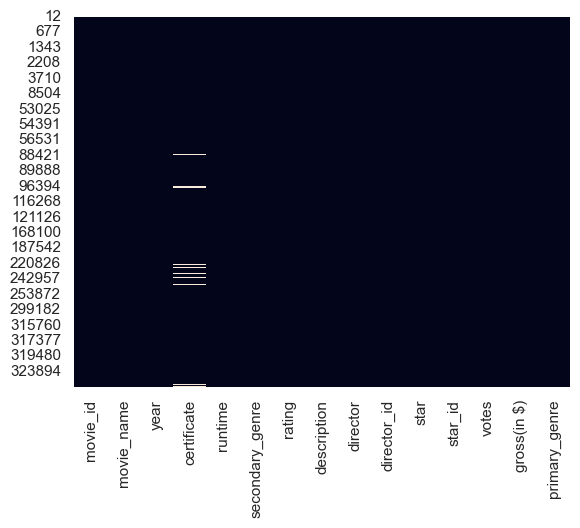

movie_id             0
movie_name           0
year                 0
certificate        660
runtime              9
secondary_genre      0
rating               0
description          0
director             1
director_id          1
star                 4
star_id              1
votes                0
gross(in $)          0
primary_genre        0
dtype: int64


In [17]:
#inspect columns for NaN values:
import seaborn as sns
import matplotlib.pyplot as plt

#heatmap to visualize NaN values in the DataFrame
sns.heatmap(df.isna(), cbar=False)
plt.show()

#print values:
nan_counts = df.isna().sum()
print(nan_counts)

In [18]:
#print a list of rows that have NaN value in "certificate", and sort it in descending order based on "gross(in $)" column:
df[df['certificate'].isna()].sort_values(by='gross(in $)', ascending=False)



,movie_id,movie_name,year,certificate,runtime,secondary_genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre
93712,tt0163862,T-Rex: Back to the Cretaceous,1998,NaN,45 min,"Family, Fantasy",4.8,A youth who finds a dinosaur egg accidentally ...,Brett Leonard,/name/nm0502577/,"Peter Horton, \nLiz Stauber, \nKari Coleman, \...","/name/nm0005022/,/name/nm0005459/,/name/nm0171...",778.0,53346750.0,Adventure
229396,tt0079510,The Main Event,1979,NaN,112 min,"Comedy, Romance, Sport",5.5,A bankrupt entrepreneur attempts to recoup som...,Howard Zieff,/name/nm0956052/,"Barbra Streisand, \nRyan O'Neal, \nPaul Sand, ...","/name/nm0000659/,/name/nm0641939/,/name/nm0761...",3005.0,42800000.0,Sports
229294,tt0078227,Semi-Tough,1977,NaN,108 min,"Comedy, Romance, Sport",5.9,A three-way friendship between two free-spirit...,Michael Ritchie,/name/nm0006916/,"Burt Reynolds, \nKris Kristofferson, \nJill Cl...","/name/nm0000608/,/name/nm0001434/,/name/nm0001...",3203.0,37187139.0,Sports
229173,tt0092214,Wildcats,1986,NaN,106 min,"Comedy, Sport",6.0,A rookie high school football coach has a hard...,Michael Ritchie,/name/nm0006916/,"Goldie Hawn, \nSwoosie Kurtz, \nRobyn Lively, ...","/name/nm0000443/,/name/nm0001436/,/name/nm0001...",14045.0,26285544.0,Sports
229177,tt0102517,Necessary Roughness,1991,NaN,108 min,"Comedy, Sport",6.2,"Due to NCAA sanctions, the Texas State Univers...",Stan Dragoti,/name/nm0236769/,"Scott Bakula, \nHector Elizondo, \nRobert Logg...","/name/nm0000836/,/name/nm0001185/,/name/nm0005...",12423.0,26255594.0,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70109,tt6079832,The Dirty Kind,2018,NaN,85 min,"Drama, Thriller",6.1,An inexperienced private investigator accident...,Vilan Trub,/name/nm2826538/,"Duke Williams, \nJohn Mertens, \nEd Glynn, \nM...","/name/nm6583286/,/name/nm8337859/,/name/nm7846...",87.0,115.0,Crime
282603,tt2190469,True Love Zombie,2012,NaN,86 min,"Comedy, , Romance",4.4,"Rhonda and Paul are a loving married couple, b...",Paul Blevins,/name/nm4860140/,"Paul Blevins, \nRhonda Blevins, \nSteve Snyder...","/name/nm4860140/,/name/nm4860569/,/name/nm4860...",46.0,100.0,Horror
230899,tt1748280,Veer!,2012,NaN,87 min,"Comedy, Drama, Romance",7.7,Jesse Sorensen ruled Florida as a pro skateboa...,Patrick Barry,/name/nm2741686/,"Jesse Gay, \nErin Cline, \nJames Nguyen, \nCor...","/name/nm4204320/,/name/nm1599810/,/name/nm3099...",80.0,85.0,Sports
289735,tt13238490,Tee em el,2020,NaN,102 min,,4.7,"'TEE EM EL' is about 'warfare, the kingdom of ...",Pereko Mosia,/name/nm11855913/,"Siyabonga Mabaso, \nLuyanda Mabote, \nReithole...","/name/nm11975421/,/name/nm11975436/,/name/nm11...",10.0,20.0,Horror


In [19]:
#assign sum of "gross(in $) where columns have NaN values: 
cer_nan_sum_of_gross = df.loc[df['certificate'].isna(), 'gross(in $)'].sum()
run_nan_sum_of_gross = df.loc[df['runtime'].isna(), 'gross(in $)'].sum()
dir_nan_sum_of_gross = df.loc[df['director'].isna(), 'gross(in $)'].sum() #NaN match with "director_id"
sta_nan_sum_of_gross = df.loc[df['star'].isna(), 'gross(in $)'].sum() #NaN match with "star_id"

771417689.0 4626135.0 1035603.0 2450357.0


In [20]:
#divide cer_nan_sum_of_gross, run_nan_sum_of_gross, dir_nan_sum_of_gross, sta_nan_sum_of_gross with total sum of gross (in $):
total_gross = df['gross(in $)'].sum()

nan_gross_percent = ((
    cer_nan_sum_of_gross + 
    run_nan_sum_of_gross + 
    dir_nan_sum_of_gross + 
    sta_nan_sum_of_gross)/ 
    total_gross) 

print(f"Percentage of gross (in $) for NaN values: {nan_gross_percent:.2%}")

Percentage of gross (in $) for NaN values: 0.28%


In [21]:
##Because the remaining NaN values make up a small portion of the movie gross, we can safely drop these rows.

#delete NaN values from columns "certificate", "runtime", "director", "star": 
df = df.dropna(subset=['certificate', 'runtime', 'director', 'star'])

In [22]:
#print NaN values once again to validate:
nan_counts = df.isna().sum()
print(nan_counts)

movie_id           0
movie_name         0
year               0
certificate        0
runtime            0
secondary_genre    0
rating             0
description        0
director           0
director_id        0
star               0
star_id            0
votes              0
gross(in $)        0
primary_genre      0
dtype: int64


### Column: Star

In [35]:
#inspect "star":
shortest_star = df.loc[df['star'].str.len().idxmin(), 'star']
longest_star = df.loc[df['star'].str.len().idxmax(), 'star']
print(shortest_star)
print(longest_star)
print(df['star'].str.len().max())


John Kerry
Dariel Arrechaga, 
Anailín de la Rúa de la Torre, 
Javier Núñez Florián, 
María Adelaida Méndez Bonet
101


In [36]:
#add a "actor_count" column:
df['actor_count'] = df['star'].str.split(',').apply(len)

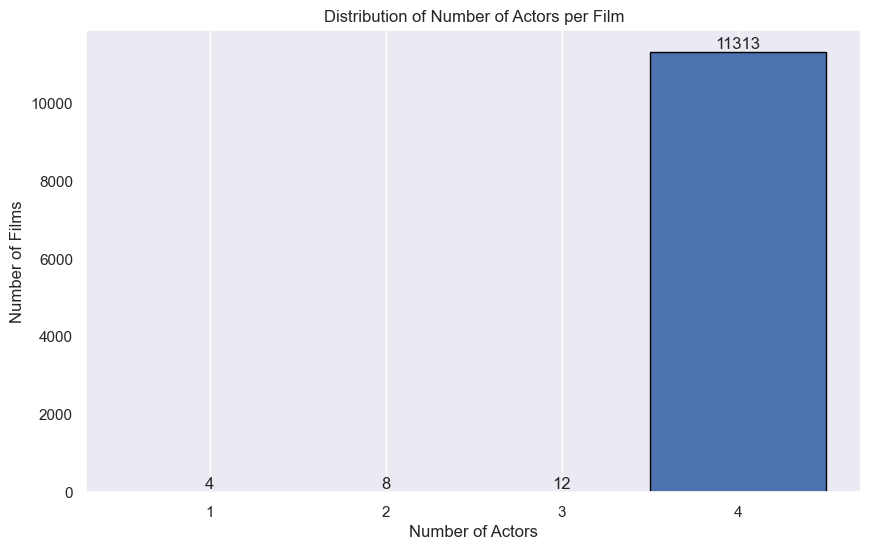

In [37]:
#print histogram for distribution of "star" column:
plt.figure(figsize=(10, 6))
ax = df['actor_count'].plot(kind='hist', bins=range(1, df['actor_count'].max() + 2), edgecolor='black', align='left')
plt.title('Distribution of Number of Actors per Film')
plt.xlabel('Number of Actors')
plt.ylabel('Number of Films')
plt.xticks(range(1, df['actor_count'].max() + 1))
plt.grid(axis='y')
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

In [38]:
#print the sum of "gross (in $)" for rows with "actor_count" of 1, 2, and 3:
print(df.loc[df['actor_count'].isin([1, 2, 3]), 'gross(in $)'].sum())

76996629.0


In [39]:
#print the full list of movies with "actor_count" of 1, 2 and 3:
df.loc[df['actor_count'].isin([1, 2, 3])].sort_values(by='gross(in $)', ascending=False)


,movie_id,movie_name,year,certificate,runtime,secondary_genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre,actor_count
52785,tt4218572,Widows,2018,R,129 min,"Drama, Thriller",6.8,Four women with nothing in common except a deb...,Steve McQueen,/name/nm2588606/,"Viola Davis, \nMichelle Rodriguez, \nElizabeth...","/name/nm0205626/,/name/nm0735442/,/name/nm4456...",99698.0,42402632.0,Crime,3
254591,tt0073053,"Give 'em Hell, Harry!",1975,PG,104 min,"Comedy, Drama",7.4,One-man show about the presidency of Harry S. ...,"Steve Binder, \nPeter H. Hunt",/name/nm0004596/,James Whitmore,"/name/nm0402596/,/name/nm0926235/",533.0,11000000.0,Biography,1
1588,tt2017038,All Is Lost,2013,PG-13,106 min,"Adventure, Drama",6.9,After a collision with a shipping container at...,J.C. Chandor,/name/nm1170855/,Robert Redford,/name/nm0000602/,81460.0,6263670.0,Action,1
234615,tt2401878,Anomalisa,2015,R,90 min,"Comedy, Drama",7.2,A man crippled by the mundanity of his life ex...,"Duke Johnson, \nCharlie Kaufman",/name/nm2122478/,"David Thewlis, \nJennifer Jason Leigh, \nTom N...","/name/nm0442109/,/name/nm0000667/,/name/nm0000...",73045.0,3759286.0,Animation,3
22555,tt7935892,The Oscar Nominated Short Films 2018: Live Action,2018,R,96 min,Drama,8.0,Collective screening of the Academy Award nomi...,Max Porter,/name/nm11475835/,"Kobe Bryant, \nTarra Riggs","/name/nm1101483/,/name/nm2743985/",209.0,3508777.0,Action,2
97723,tt0068318,Brother of the Wind,1972,G,88 min,,7.6,A mountain man saves four wolf cubs after thei...,Dick Robinson,/name/nm0732555/,"Leon Ames, \nDick Robinson","/name/nm0000748/,/name/nm0732555/",92.0,3328507.0,Adventure,2
88338,tt6820256,Arctic,2018,PG-13,98 min,Drama,6.8,A man stranded in the Arctic after a plane cra...,Joe Penna,/name/nm1020835/,"Mads Mikkelsen, \nMaria Thelma Smáradóttir, \n...","/name/nm0586568/,/name/nm5386550/,/name/nm1044...",54313.0,2410795.0,Adventure,3
1395,tt4218696,The Wall,2017,R,88 min,"Drama, Thriller",6.2,Two American Soldiers are trapped by a lethal ...,Doug Liman,/name/nm0510731/,"Aaron Taylor-Johnson, \nJohn Cena, \nLaith Nakli","/name/nm1093951/,/name/nm1078479/,/name/nm1821...",28111.0,1803064.0,Action,3
236343,tt6246170,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,2016,Not Rated,134 min,,8.5,A profound and courageous story on how Guru Gr...,Harry Baweja,/name/nm0062614/,"Harman Baweja, \nPawan Kalra, \nOm Puri","/name/nm2102514/,/name/nm10637201/,/name/nm070...",801.0,694280.0,Animation,3
114428,tt0870984,Antichrist,2009,Not Rated,108 min,"Drama, Horror",6.5,A grieving couple retreat to their cabin in th...,Lars von Trier,/name/nm0001885/,"Willem Dafoe, \nCharlotte Gainsbourg, \nStorm ...","/name/nm0000353/,/name/nm0001250/,/name/nm3527...",129239.0,397070.0,Thriller,3


In [40]:
#delete rows with "actor_count" of 1, 2 and 3:
df = df.loc[~df['actor_count'].isin([1, 2, 3])]